In [2]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101004644138,2023-01-26 09:08:00,2024-01-26 09:09:18,NaN,ONTIME,Open,,Tree Maintenance,Parks & Recreation Department,Trees,...,B3,Greater Mattapan,8,Ward 14,1406,36 Fowler St,2121.0,42.3007,-71.0825,City Worker App
1,101004663810,2023-02-10 12:40:00,NaN,NaN,ONTIME,Open,,Mattress Pickup,Public Works Department,Sanitation,...,E18,Hyde Park,10,Ward 18,1819,19 Eastmont Rd,2136.0,42.2514,-71.1443,Constituent Call
2,101004620354,2023-01-05 09:32:16,2023-03-13 09:32:18,NaN,ONTIME,Open,,Graffiti Removal,Property Management,Graffiti,...,D4,Back Bay,14,Ward 5,0509,90-90 Massachusetts Ave,2115.0,42.3486,-71.0881,Citizens Connect App
3,101004682380,2023-02-18 07:15:57,2023-02-22 08:30:00,NaN,ONTIME,Open,,CE Collection,Public Works Department,Street Cleaning,...,A1,Beacon Hill,3,Ward 3,0306,46-48 Irving St,2114.0,42.3600,-71.0662,City Worker App
4,101004620594,2023-01-05 11:46:00,2023-01-06 11:46:19,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,...,E18,Roslindale,10,18,1807,582-582F Canterbury St,2131.0,42.2879,-71.1083,Constituent Call


In [3]:
import pandas as pd

def extract_name_parts(df, location):

    # Split the location into its component parts
    split_locs = df[location].str.split('  ', expand=True)

    # Extract the area code from the zip code
    area_code = split_locs[2].str.split(' ', expand=True)[0]

    # Add new columns to the original dataframe
    df['area_code'] = area_code
    df['state'] = split_locs[1]
    df['area'] = split_locs[2]
    df['street_address'] = split_locs[0]

    return df
# Extract the location information
df = extract_name_parts(df, 'location')
df.head(10)


,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,precinct,location_street_name,location_zipcode,latitude,longitude,source,area_code,state,area,street_address
0,101004644138,2023-01-26 09:08:00,2024-01-26 09:09:18,NaN,ONTIME,Open,,Tree Maintenance,Parks & Recreation Department,Trees,...,1406,36 Fowler St,2121.0,42.3007,-71.0825,City Worker App,MA,Dorchester,MA,36 Fowler St
1,101004663810,2023-02-10 12:40:00,NaN,NaN,ONTIME,Open,,Mattress Pickup,Public Works Department,Sanitation,...,1819,19 Eastmont Rd,2136.0,42.2514,-71.1443,Constituent Call,MA,Hyde Park,MA,19 Eastmont Rd
2,101004620354,2023-01-05 09:32:16,2023-03-13 09:32:18,NaN,ONTIME,Open,,Graffiti Removal,Property Management,Graffiti,...,0509,90-90 Massachusetts Ave,2115.0,42.3486,-71.0881,Citizens Connect App,MA,Boston,MA,90-90 Massachusetts Ave
3,101004682380,2023-02-18 07:15:57,2023-02-22 08:30:00,NaN,ONTIME,Open,,CE Collection,Public Works Department,Street Cleaning,...,0306,46-48 Irving St,2114.0,42.3600,-71.0662,City Worker App,MA,Boston,MA,46-48 Irving St
4,101004620594,2023-01-05 11:46:00,2023-01-06 11:46:19,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,...,1807,582-582F Canterbury St,2131.0,42.2879,-71.1083,Constituent Call,MA,Roslindale,MA,582-582F Canterbury St
5,101004626163,2023-01-10 12:55:00,2023-01-27 12:55:51,NaN,OVERDUE,Open,,Abandoned Vehicles,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,1504,5 Fernald Ter,2125.0,42.3101,-71.0664,Citizens Connect App,MA,Dorchester,MA,5 Fernald Ter
6,101004648571,2023-01-30 08:06:47,2023-02-06 08:30:00,NaN,OVERDUE,Open,,Recycling Cart Return,Public Works Department,Recycling,...,2207,38 Fairbanks St,2135.0,42.3501,-71.1632,City Worker App,MA,Brighton,MA,38 Fairbanks St
7,101004615814,2023-01-01 03:44:00,2023-01-02 03:44:01,2023-01-02 06:15:54,OVERDUE,Closed,Case Closed. Closed date : 2023-01-02 06:15:54...,Traffic Signal Inspection,Transportation - Traffic Division,Signs & Signals,...,1202,INTERSECTION Blue Hill Ave & Warren St,NaN,42.3594,-71.0587,Constituent Call,MA,Dorchester,MA,INTERSECTION of Blue Hill Ave & Warren St
8,101004615971,2023-01-01 12:03:00,2023-01-04 08:30:00,NaN,OVERDUE,Open,,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,2012,70 Park St,2132.0,42.2858,-71.1571,Citizens Connect App,MA,West Roxbury,MA,70 Park St
9,101004615974,2023-01-01 12:05:17,2023-01-04 08:30:00,2023-01-01 16:01:26,ONTIME,Closed,Case Closed. Closed date : Sun Jan 01 16:01:26...,Empty Litter Basket,Public Works Department,Highway Maintenance,...,0504,280 Cambridge St,2114.0,42.3610,-71.0680,Citizens Connect App,MA,Boston,MA,280 Cambridge St


In [4]:
def drop_na(df):
    return df.dropna()

df = drop_na(df)
df.columns

Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submittedphoto', 'closedphoto',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'source', 'area_code', 'state', 'area',
       'street_address'],
      dtype='object')

In [16]:
count = df['location_zipcode'].value_counts()
print(count)

2128.0    3
2124.0    2
2119.0    2
2114.0    1
2131.0    1
2120.0    1
2129.0    1
2130.0    1
2113.0    1
2122.0    1
Name: location_zipcode, dtype: int64


In [17]:
df.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,precinct,location_street_name,location_zipcode,latitude,longitude,source,area_code,state,area,street_address
4546,101004682635,2023-02-18 12:37:35,2023-02-23 08:30:00,2023-02-19 08:03:43,ONTIME,Closed,Case Closed. Closed date : Sun Feb 19 08:03:43...,Improper Storage of Trash (Barrels),Public Works Department,Code Enforcement,...,0306,37 S Russell St,2114.0,42.3601,-71.0661,Citizens Connect App,MA,Boston,MA,37 S Russell St
9225,101004683472,2023-02-19 22:50:12,2023-02-24 08:30:00,2023-02-20 10:05:14,ONTIME,Closed,Case Closed. Closed date : Mon Feb 20 10:05:14...,Poor Conditions of Property,Public Works Department,Code Enforcement,...,1911,34 Colgate Rd,2131.0,42.2939,-71.1222,Citizens Connect App,MA,Roslindale,MA,34 Colgate Rd
13878,101004668713,2023-02-15 08:56:43,2023-02-21 08:56:43,2023-02-15 09:25:55,ONTIME,Closed,Case Closed. Closed date : Wed Feb 15 09:25:55...,Poor Conditions of Property,Public Works Department,Code Enforcement,...,1704,20 Codman Hill Ave,2124.0,42.2796,-71.0712,Citizens Connect App,MA,Dorchester,MA,20 Codman Hill Ave
14239,101004680946,2023-02-16 17:43:45,2023-02-21 08:30:00,2023-02-16 18:00:48,ONTIME,Closed,Case Closed. Closed date : Thu Feb 16 18:00:48...,Pick up Dead Animal,Public Works Department,Street Cleaning,...,1003,698 Huntington Ave,2120.0,42.3345,-71.1033,Citizens Connect App,MA,Mission Hill,MA,698 Huntington Ave
14591,101004683511,2023-02-20 06:55:01,2023-02-23 08:30:00,2023-02-20 07:53:33,ONTIME,Closed,Case Closed. Closed date : Mon Feb 20 07:53:33...,Improper Storage of Trash (Barrels),Public Works Department,Code Enforcement,...,0202,73 Old Ironsides Way,2129.0,42.3807,-71.0582,Employee Generated,MA,Charlestown,MA,73 Old Ironsides Way


In [3]:
df11= pd.read_csv("data.csv")
df11

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101004644138,2023-01-26 09:08:00,2024-01-26 09:09:18,NaN,ONTIME,Open,,Tree Maintenance,Parks & Recreation Department,Trees,...,B3,Greater Mattapan,8,Ward 14,1406,36 Fowler St,2121.0,42.3007,-71.0825,City Worker App
1,101004663810,2023-02-10 12:40:00,NaN,NaN,ONTIME,Open,,Mattress Pickup,Public Works Department,Sanitation,...,E18,Hyde Park,10,Ward 18,1819,19 Eastmont Rd,2136.0,42.2514,-71.1443,Constituent Call
2,101004620354,2023-01-05 09:32:16,2023-03-13 09:32:18,NaN,ONTIME,Open,,Graffiti Removal,Property Management,Graffiti,...,D4,Back Bay,14,Ward 5,0509,90-90 Massachusetts Ave,2115.0,42.3486,-71.0881,Citizens Connect App
3,101004682380,2023-02-18 07:15:57,2023-02-22 08:30:00,NaN,ONTIME,Open,,CE Collection,Public Works Department,Street Cleaning,...,A1,Beacon Hill,3,Ward 3,0306,46-48 Irving St,2114.0,42.3600,-71.0662,City Worker App
4,101004620594,2023-01-05 11:46:00,2023-01-06 11:46:19,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,...,E18,Roslindale,10,18,1807,582-582F Canterbury St,2131.0,42.2879,-71.1083,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37414,101004647101,2023-01-28 12:24:11,2023-01-31 08:30:00,2023-02-01 09:04:29,OVERDUE,Closed,Case Closed. Closed date : Wed Feb 01 09:04:29...,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,C11,Dorchester,8,Ward 15,1506,1188 Dorchester Ave,2125.0,42.3100,-71.0575,Citizens Connect App
37415,101004647112,2023-01-28 12:32:00,NaN,2023-02-01 16:15:32,ONTIME,Closed,Case Closed. Closed date : 2023-02-01 16:15:32...,Mattress Pickup,Public Works Department,Sanitation,...,C6,South Boston / South Boston Waterfront,5,Ward 6,0607,68 L St,2127.0,42.3353,-71.0352,Constituent Call
37416,101004616028,2023-01-01 13:30:00,2023-01-04 08:30:00,NaN,OVERDUE,Open,,Pick up Dead Animal,Public Works Department,Street Cleaning,...,A1,Boston,3,03,,280 Charles St,2114.0,42.3644,-71.0705,Citizens Connect App
37417,101004644046,2023-01-26 08:34:46,2023-01-27 08:35:00,2023-01-27 06:49:53,ONTIME,Closed,Case Closed. Closed date : Fri Jan 27 06:49:53...,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,A15,Charlestown,2,02,0204,65-73 Polk St,2129.0,42.3799,-71.0605,Citizens Connect App


In [6]:
grouped = df11.groupby(['location_zipcode', 'case_status'])
closed_counts = grouped.size().loc[:, 'Closed'].sort_values(ascending=False)
closed_counts.head()


location_zipcode
2128.0    2221
2127.0    1941
2124.0    1788
2135.0    1533
2118.0    1477
dtype: int64

In [37]:
col_names = df11.columns.tolist()
print(col_names)

['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime', 'case_status', 'closure_reason', 'case_title', 'subject', 'reason', 'type', 'queue', 'department', 'submittedphoto', 'closedphoto', 'location', 'fire_district', 'pwd_district', 'city_council_district', 'police_district', 'neighborhood', 'neighborhood_services_district', 'ward', 'precinct', 'location_street_name', 'location_zipcode', 'latitude', 'longitude', 'source']


In [9]:
closed_counts_2 = df11[df11['case_status'] == 'Closed'].groupby('location_zipcode').size()
print(closed_counts_2)

open_counts = df11[df11['case_status'] == 'Open'].groupby('location_zipcode').size()
print(open_counts)

location_zipcode
2108.0     278
2109.0     219
2110.0      65
2111.0     293
2113.0     545
2114.0     813
2115.0     479
2116.0    1187
2118.0    1477
2119.0    1059
2120.0     427
2121.0     941
2122.0     938
2124.0    1788
2125.0    1279
2126.0     884
2127.0    1941
2128.0    2221
2129.0     631
2130.0    1288
2131.0     839
2132.0     751
2134.0     620
2135.0    1533
2136.0     861
2163.0       3
2199.0      17
2210.0     154
2215.0     338
2467.0      10
dtype: int64
location_zipcode
2108.0     57
2109.0     52
2110.0     25
2111.0     82
2113.0     43
2114.0    143
2115.0    140
2116.0    261
2118.0    292
2119.0    234
2120.0    122
2121.0    237
2122.0    200
2124.0    505
2125.0    316
2126.0    284
2127.0    316
2128.0    318
2129.0    185
2130.0    364
2131.0    279
2132.0    232
2134.0    102
2135.0    208
2136.0    270
2199.0      3
2210.0     26
2215.0    118
2467.0      4
dtype: int64


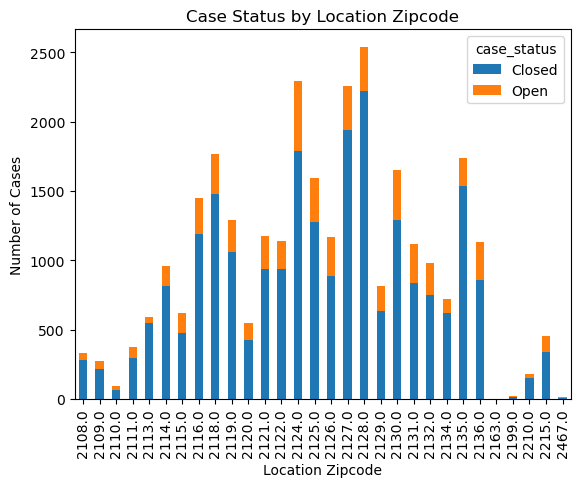

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by 'location_zipcode' and 'case_status' and count the number of cases in each group
case_counts = df11.groupby(['location_zipcode', 'case_status']).size().unstack()

# Create a bar chart of the case counts for each location_zipcode
case_counts.plot(kind='bar', stacked=True)

# Add chart title and axis labels
plt.title('Case Status by Location Zipcode')
plt.xlabel('Location Zipcode')
plt.ylabel('Number of Cases')

# Display the chart
plt.show()



In [11]:
import pandas as pd

# Calculate the number of cases with 'Open' and 'Closed' status for each location_zipcode
case_counts = df11.groupby(['location_zipcode', 'case_status']).size().unstack()
case_counts.columns = ['Open Cases', 'Closed Cases']

# Calculate the total number of cases for each location_zipcode
total_counts = case_counts.sum(axis=1)

# Calculate the percentage of cases that are closed for each location_zipcode
case_percents = case_counts['Closed Cases'] / total_counts * 100

# Print summary statistics for the percentage of cases that are closed
print(case_percents.describe())


count    29.000000
mean     19.415816
std       5.102761
min       7.312925
25%      15.000000
50%      19.811912
75%      22.671569
max      28.571429
dtype: float64


In [13]:
import pandas as pd


# Calculate the number of 'Open' cases for each location_zipcode
open_counts_1 = df11[df11['case_status'] == 'Open'].groupby('location_zipcode').size().reset_index(name='Open Cases')

# Calculate the number of 'Closed' cases for each location_zipcode
closed_counts_1 = df11[df11['case_status'] == 'Closed'].groupby('location_zipcode').size().reset_index(name='Closed Cases')

# Join the two DataFrames on the 'location_zipcode' column
merged_counts = open_counts_1.merge(closed_counts_1, on='location_zipcode')

# Set the 'location_zipcode' column as the index of the merged DataFrame
merged_counts.set_index('location_zipcode', inplace=True)

# Display the merged DataFrame
print(merged_counts)


                  Open Cases  Closed Cases
location_zipcode                          
2108.0                    57           278
2109.0                    52           219
2110.0                    25            65
2111.0                    82           293
2113.0                    43           545
2114.0                   143           813
2115.0                   140           479
2116.0                   261          1187
2118.0                   292          1477
2119.0                   234          1059
2120.0                   122           427
2121.0                   237           941
2122.0                   200           938
2124.0                   505          1788
2125.0                   316          1279
2126.0                   284           884
2127.0                   316          1941
2128.0                   318          2221
2129.0                   185           631
2130.0                   364          1288
2131.0                   279           839
2132.0     

In [15]:

import pandas as pd

# Read the data from a CSV file
df = pd.read_csv('data.csv')

# Group the data by location_zipcode and case_status
grouped = df.groupby(['location_zipcode', 'case_status'])

# Calculate the count of cases for each location_zipcode and case_status
counts = grouped.size().unstack()

# Calculate the total number of cases for each location_zipcode
counts['Total'] = counts.sum(axis=1)

# Calculate the percentage of 'Open' and 'Closed' cases for each location_zipcode
counts['Open %'] = counts['Open'] / counts['Total'] * 100
counts['Closed %'] = counts['Closed'] / counts['Total'] * 100

# Print the results
print(counts)


case_status       Closed   Open   Total     Open %    Closed %
location_zipcode                                              
2108.0             278.0   57.0   335.0  17.014925   82.985075
2109.0             219.0   52.0   271.0  19.188192   80.811808
2110.0              65.0   25.0    90.0  27.777778   72.222222
2111.0             293.0   82.0   375.0  21.866667   78.133333
2113.0             545.0   43.0   588.0   7.312925   92.687075
2114.0             813.0  143.0   956.0  14.958159   85.041841
2115.0             479.0  140.0   619.0  22.617124   77.382876
2116.0            1187.0  261.0  1448.0  18.024862   81.975138
2118.0            1477.0  292.0  1769.0  16.506501   83.493499
2119.0            1059.0  234.0  1293.0  18.097448   81.902552
2120.0             427.0  122.0   549.0  22.222222   77.777778
2121.0             941.0  237.0  1178.0  20.118846   79.881154
2122.0             938.0  200.0  1138.0  17.574692   82.425308
2124.0            1788.0  505.0  2293.0  22.023550   77